In [14]:
from google.colab import drive
drive.mount('content/drive/LENSS/Data')

ValueError: ignored

In [1]:
#####################################################################################
##                              SENSOR ##                                          ##
##                                                                                 ##
#####################################################################################

In [2]:
# This cell added by Chris Kirby on the 10th March 2022
# install the software packages on the colab instance
! pip3 install astroplan
! pip3 install astropy
! pip3 install astral
! pip3 install julian
! pip3 install astral




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for astroplan: filename=astroplan-0.8-py3-none-any.whl size=83275 sha256=e3e6a53d14ee6b5631782530e08295edcaff3c02e9f5c31abfe19828bf681ba1
  Stored in directory: /root/.cache/pip/wheels/4f/c5/6d/20497dbabe23d89c54991f269460480788f7a6d15b4d1ae134
Successfully built astroplan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for julian: filename=julian-0.14-py3-none-any.whl size=2633 sha256=bae7c219d46c7c2f62199adfb1477d5328f7042e08af2563

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astroplan import Observer
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation
import statistics
from datetime import datetime, timedelta
from datetime import date
from astral.sun import sun
import julian
#from astral import Astral

In [4]:
#### LENSS Sensors collect data all the time, so the files for each day go from 12:00 am to 11:59 PM. Thus this code has 
####    to read in two separate text files, find the beginning of the night from the first file and the end of the night
####    from the second file, and plot them accordingly. It must also be automated to run everyday for the new files. 
####
#### The first part of this process is determining the date and selecting the files for a few days before.

today = date.today()

#date of the evening part
d1 = timedelta(days = 2)
evening_date = str(today - d1)
even_d1 = today - d1
year_mon1 = even_d1.strftime("%Y-%m")

#date of the morning
d2 = timedelta(days = 1)
morning_date = str(today - d2)
morn_d2 = today - d2
year_mon2 = morn_d2.strftime("%Y-%m")

In [5]:
### automate the file names by creating a string

sensorfile = 'LENSS_TSL_0003'
sensorname = '_LENSSTSL0003'
sensornumber = 'Sensor 3'
filename1 = evening_date + sensorname + '.txt'
filename2 = morning_date + sensorname + '.txt'
#print(filename1,filename2)

In [8]:
##ONCE pi is connected to GLAS google this will be relevent 

folder_path1 = 'LENSS/Data/Sensors Data/' + year_mon1 + '/'+ sensorfile +'/'+ filename1
folder_path2 = 'LENSS/Data/Sensors Data/' + year_mon2 + '/'+ sensorfile +'/'+ filename2

print(folder_path1)

LENSS/Data/Sensors Data/2022-06/LENSS_TSL_0003/2022-06-05_LENSSTSL0003.txt


In [9]:
# open file


evening_time = []
morning_time = []

#celcius
evening_temp=[]
morning_temp=[]

evening_voltage=[]
morning_voltage=[]

evening_frequency=[]
morning_frequency=[]


evening_time1 = []
morning_time1 = []

a1 = evening_date + 'T'
a2 = morning_date + 'T'
#### Evening part of Night

f1 = open(filename1, 'r')
lines = f1.readlines()

for x in lines:
    evening_time.append(str(x.split(',')[0]))
    evening_voltage.append(float(x.split(',')[1]))
    evening_frequency.append(float(x.split(',')[2]))
    evening_temp.append(float(x.split(',')[3]))

for m in range(len(evening_time)):
    evening_time1.append(a1+evening_time[m])

f1.close()

                  
#### Morning Part of Night                   
f2 = open(filename2, 'r')
lines = f2.readlines()

for x in lines:
    morning_time.append(str(x.split(',')[0]))
    morning_voltage.append(float(x.split(',')[1]))
    morning_frequency.append(float(x.split(',')[2]))
    morning_temp.append(float(x.split(',')[3]))

for m in range(len(morning_time)):
    morning_time1.append(a2+morning_time[m])
f2.close()


## save the first date of the night's filename as a string and then extract the date of the first half of the night 
##    as a separate string
evening = os.path.splitext(f1.name)[0]
evening_date = str(evening.split('_')[0])

## second half of night
morning = os.path.splitext(f2.name)[0]
morning_date = str(morning.split('_')[0])


FileNotFoundError: ignored

In [ ]:
evening_mjd_time = []
morning_mjd_time = []

t = Time(evening_time1, format='isot', scale='local')
m1 = t.mjd

for m in range(len(evening_time1)):
    evening_mjd_time.append(m1[m])
    
t1 = Time(morning_time1, format='isot', scale='local')
m2 = t1.mjd

for m in range(len(morning_time1)):
    morning_mjd_time.append(m2[m])



NameError: ignored

In [ ]:
location1 = Observer(longitude=-88.5375518*u.deg, latitude=42.587277*u.deg, elevation=879*u.m)

## these will need to be changed every time the code is run (Time('yyyy-mm-dd hh:mm:ss.sss'))
## generalize by using string of filename?


#### I chose 4 pm on the evening of the first day for evening twilight and 5 am for morning twilight
twilight_evening_date = evening_date + ' 16:00:00.000'
twilight_morning_date = morning_date + ' 05:00:00.000'


print(twilight_evening_date)
evening = float(str(location1.twilight_evening_astronomical(Time(twilight_evening_date)))) - 2400000.5 - (6*(.5/12))
morning = float(str(location1.twilight_morning_astronomical(Time(twilight_morning_date)))) - 2400000.5 - (6*(.5/12))
moon = float(str(location1.moon_illumination(twilight_evening_date)))
moon_phase = []
print(evening,morning,moon)


if moon == 0:
    moon_phase.append('New Moon')
elif (moon > 0) and (moon< .5):
    moon_phase.append('Cresent')
elif (moon_phase == .5):
    moon_phase.append('Quarter')
elif (moon > .5) and (moon< 1):
    moon_phase.append('Gibbous')
elif (moon_phase == 1):
    moon_phase.append('Full')



##  moon illumination and phase... 
##    0 = new moon
##    0 - .5 = cresent
##   .5 = quarter
##  .501 - 1 = gibbous
##    1 = full moon
##   find moon rise and set times?

2021-07-17 16:00:00.000
59412.89847568516 59413.10228744382 0.528773317513717


In [ ]:
local_time = []
mjd_time=[]
temp = []
voltage = []


mjd_evening1 = []
evening_frequency1 = []

evening_temp1 = []
morning_temp1 = []


evening_voltage1 = []
morning_voltage1 = []

mjd_morning1 = []
morning_frequency1 = []

local_time1 = []
local_time2 = []

for i in range(len(evening_mjd_time)):
    if (evening_mjd_time[i] >= evening):
        mjd_evening1.append(evening_mjd_time[i])
        evening_frequency1.append(evening_frequency[i])
        local_time1.append(evening_time[i])
        evening_temp1.append(evening_temp[i])
        evening_voltage1.append(evening_voltage[i])
        #feb26a_local.append(feb26_local[i])


for i in range(len(morning_mjd_time)):
    if (morning_mjd_time[i] <= morning):
        mjd_morning1.append(morning_mjd_time[i])
        morning_frequency1.append(morning_frequency[i])
        local_time2.append(morning_time[i])
        morning_temp1.append(morning_temp[i])
        morning_voltage1.append(morning_voltage[i])

#print(local_time1)
        
frequency = evening_frequency1 + morning_frequency1
mjd_time = mjd_evening1 +  mjd_morning1
local_time = local_time1 + local_time2
temp = evening_temp1 + morning_temp1
voltage = evening_voltage1 + morning_voltage1

local_12time= []

#frequency =  np.array(frequency)
#mjd_time = np.array(mjd_time)


# convert local_time array from strings in 24 time to string objects in 12 hour time
for i in range (len(local_time)):
    x1 = local_time[i]
    x2 = datetime.strptime(x1, "%H:%M:%S")
    local_12time.append(x2.strftime("%I:%M %p"))

    
    
#print(local_time)
#print(local_time[0],local_time[10],local_time[20],local_time[30],local_time[40],local_time[50])
#print(local_12time[0],local_12time[10],local_12time[20],local_12time[30],local_12time[40],local_12time[50])

In [ ]:
#### finding SUNSET and SUNRISE
#### Generalize Later!!!



## find sunset and convert from MJD to standard
s1 = float(str(location1.sun_set_time(Time(twilight_evening_date), which='nearest'))) - 2400000.5 - (6*(.5/12))
s2 = julian.from_jd(s1, fmt='mjd')
sunset_24time = s2.strftime(("%H:%M"))
sunset_12time = s2.strftime("%m-%d-%y %I:%M %p")
#print(sunset_12time)
## sunrise
s3 = float(str(location1.sun_rise_time(Time(twilight_morning_date), which='nearest'))) - 2400000.5 - (6*(.5/12))
s4 = julian.from_jd(s3, fmt='mjd')
sunrise_24time = s4.strftime(("%H:%M"))
sunrise_12time = s4.strftime("%m-%d-%y %I:%M %p")


m1 = float(str(location1.moon_rise_time(Time(twilight_evening_date), which='nearest'))) - 2400000.5 - (6*(.5/12))
m2 = julian.from_jd(m1, fmt='mjd')
moonrise_24time = m2.strftime(("%H:%M"))
moonrise_12time = m2.strftime("%m-%d-%y %I:%M %p")
print(moonrise_12time)

m3 = float(str(location1.moon_set_time(Time(twilight_morning_date), which='nearest'))) - 2400000.5 - (6*(.5/12))
m4 = julian.from_jd(m3, fmt='mjd')
moonset_24time = m4.strftime(("%H:%M"))
moonset_12time = m4.strftime("%m-%d-%y %I:%M %p")
print(moonset_12time)


07-17-21 12:44 PM
07-17-21 11:42 PM


In [ ]:
#print(local_time)
min_frequency = float(min(frequency))
y_min = min_frequency - 10

max_frequency = float(max(frequency))
y_max = max_frequency + 10



mean_freq = str(round((sum(frequency)/len(frequency)),2))
median_freq = str(round(statistics.median(frequency),2))

In [ ]:
#### save the data in a text file to have a counting average to recall later
## change it for sensor

#f3 = open("lenss_data.txt",'a')
#f3.write('\n')
#f3.write(sensornumber)
#f3.write(",")
#f3.write(evening_date)
#f3.write(",")
#f3.write(mean_freq)
#f3.write(",")
#f3.write(median_freq)


#f3.close()


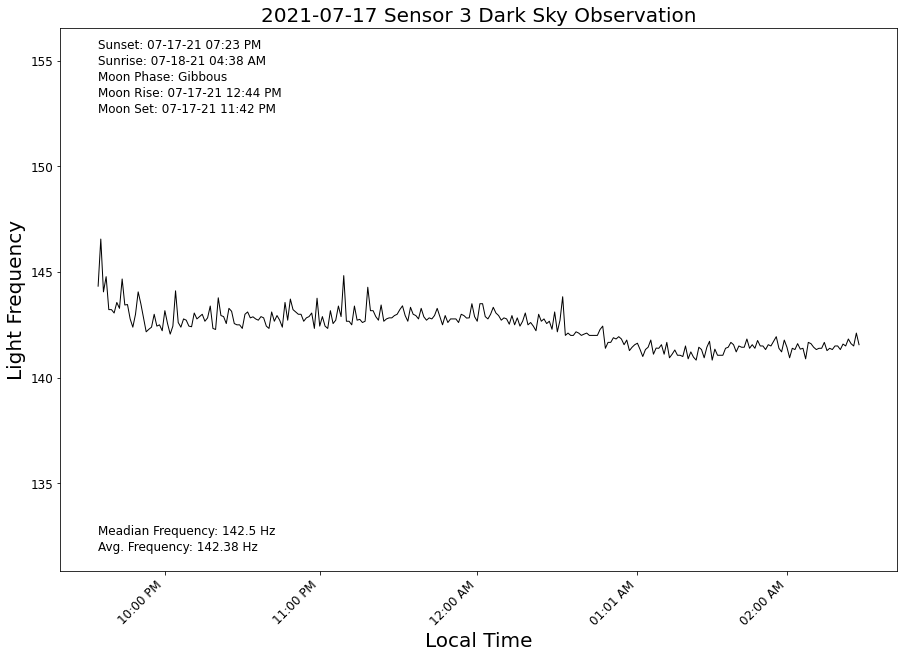

In [ ]:
#plt.figure(figsize=(15,10))
#plt.plot(mjd_time,frequency,color='k', linewidth = 1)
##plt.xticks(['21:00:05.000','00:00:05.000','03:00:05.000'])
#plt.xticks(rotation = 45,ha = 'right')
##plt.axhline(np.mean(feb26a_msas),linestyle = '--')
##plt.text(min())
#plt.ylim(0,60)
#plt.show()


plt.figure(figsize=(15,10))
plt.plot(local_12time,frequency,color='k', linewidth = 1)

#if len(local_12time)
#plt.xticks(local_time, values)
#plt.xticks(['21:00:01','00:00:01','03:00:00'],fontsize = 12)
plt.xticks(['10:00 PM','11:00 PM', '12:00 AM', '01:01 AM', '02:00 AM'],fontsize = 12)
plt.xticks(rotation = 45,ha = 'right')
plt.yticks(fontsize = 12)
plt.title(evening_date + ' ' + sensornumber+ ' Dark Sky Observation',fontsize = 20)
plt.xlabel('Local Time', fontsize = 20)
plt.ylabel('Light Frequency',fontsize = 20)
plt.ylim(y_min, y_max)
plt.text(local_12time[0], y_max - 1, 'Sunset: ' + sunset_12time , fontsize = 12)
plt.text(local_12time[0], y_max - 1.75, 'Sunrise: ' + sunrise_12time  , fontsize = 12)
plt.text(local_12time[0], y_max - 2.5, 'Moon Phase: ' + moon_phase[0] , fontsize = 12)
plt.text(local_12time[0], y_max - 3.25,  'Moon Rise: ' + moonrise_12time , fontsize = 12)
plt.text(local_12time[0], y_max - 4, 'Moon Set: ' +  moonset_12time, fontsize = 12)
plt.text(local_12time[0], y_min + 1, 'Avg. Frequency: ' + mean_freq + ' Hz', fontsize = 12)
plt.text(local_12time[0], y_min + 1.75, 'Meadian Frequency: ' + median_freq + ' Hz', fontsize = 12)
plt.show()
## TO DO: save plt as png

#plt.figure(figsize=(15,10))
#lt.plot(mjd_time,temp,color='k', linewidth = 1)
#plt.xticks(['21:00:05.000','00:00:05.000','03:00:05.000'])
#plt.xticks(rotation = 45,ha = 'right')
#plt.axhline(np.mean(feb26a_msas),linestyle = '--')
#plt.text(min())
#plt.ylim(0,60)
#plt.show()

In [ ]:
### upload to website 


